In [114]:
# %load_ext autotime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [115]:
np.random.seed(32)

## user

In [116]:
user_column_names = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
user_df = pd.read_csv("ml-100k/u.user", sep='|', names=user_column_names)

In [117]:
user_df.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [118]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [119]:
user_df.drop(columns="zip_code", inplace=True)

In [120]:
user_df['age'] = pd.cut(user_df['age'], [0, 10, 20, 30, 40, 50, 100],
                        labels=['1', '2', '3', '4', '5', '6'])

In [121]:
user_df = pd.get_dummies(user_df)

In [122]:
user_df.head()

,user_id,age_1,age_2,age_3,age_4,age_5,age_6,sex_F,sex_M,occupation_administrator,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [123]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   user_id                   943 non-null    int64
 1   age_1                     943 non-null    uint8
 2   age_2                     943 non-null    uint8
 3   age_3                     943 non-null    uint8
 4   age_4                     943 non-null    uint8
 5   age_5                     943 non-null    uint8
 6   age_6                     943 non-null    uint8
 7   sex_F                     943 non-null    uint8
 8   sex_M                     943 non-null    uint8
 9   occupation_administrator  943 non-null    uint8
 10  occupation_artist         943 non-null    uint8
 11  occupation_doctor         943 non-null    uint8
 12  occupation_educator       943 non-null    uint8
 13  occupation_engineer       943 non-null    uint8
 14  occupation_entertainment  943 non-null    

## item

In [124]:
item_column_names = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

item_df = pd.read_csv('ml-100k/u.item', sep='|', names=item_column_names, encoding='latin-1')


In [125]:
item_df.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [126]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [127]:
item_df['year'] = pd.DatetimeIndex(pd.to_datetime(item_df['release date'])).year

In [128]:
item_df[item_df['year'].isnull()]

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


rating_df에서 movie_id 267을 찾아보니 10개 정도 있다. 그냥 drop하면 안된다. 
최소 값으로 채워 넣자.

In [129]:
item_df.loc[item_df['year'].isnull(), 'year'] = item_df['year'].min()

In [130]:
item_df.iloc[266]

movie id                  267
movie title           unknown
release date              NaN
video release date        NaN
IMDb URL                  NaN
unknown                     1
Action                      0
Adventure                   0
Animation                   0
Children's                  0
Comedy                      0
Crime                       0
Documentary                 0
Drama                       0
Fantasy                     0
Film-Noir                   0
Horror                      0
Musical                     0
Mystery                     0
Romance                     0
Sci-Fi                      0
Thriller                    0
War                         0
Western                     0
year                   1922.0
Name: 266, dtype: object

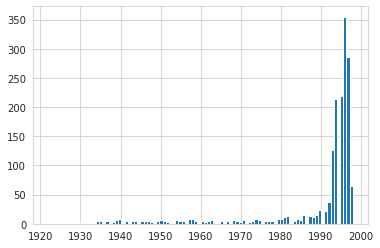

In [131]:
plt.hist(item_df['year'], bins=96)
plt.show()

In [132]:
MIN_YEAR = 1970
item_df.loc[item_df['year']<MIN_YEAR, 'year'] = MIN_YEAR

In [133]:
item_df['year'].value_counts()

1996.0    355
1997.0    286
1995.0    219
1994.0    214
1970.0    177
1993.0    126
1998.0     65
1992.0     37
1990.0     24
1991.0     22
1989.0     15
1986.0     15
1987.0     13
1982.0     13
1981.0     12
1988.0     11
1979.0      9
1974.0      8
1980.0      8
1984.0      8
1971.0      7
1985.0      7
1975.0      6
1983.0      5
1976.0      5
1973.0      4
1977.0      4
1978.0      4
1972.0      3
Name: year, dtype: int64

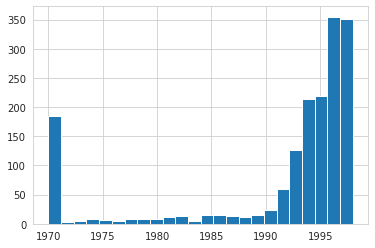

In [134]:
plt.hist(item_df['year'], bins=24)
plt.show()

In [135]:
item_df.drop(columns=['movie title', 'release date', 'video release date', 'IMDb URL'], inplace=True)
# item_df.drop(columns=['movie title', 'video release date', 'IMDb URL'], inplace=True)
item_df.head()

,movie id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1995.0


In [136]:
for column in ["year"]:
    MIN = item_df[column].min()
    MAX = item_df[column].max()
    print(f"MIN={MIN}, MAX={MAX}")
    item_df[column] = (item_df[column] - MIN) / (MAX - MIN)
item_df.head()

MIN=1970.0, MAX=1998.0


,movie id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.892857
1,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.892857
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.892857
3,4,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.892857
4,5,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0.892857


In [137]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie id     1682 non-null   int64  
 1   unknown      1682 non-null   int64  
 2   Action       1682 non-null   int64  
 3   Adventure    1682 non-null   int64  
 4   Animation    1682 non-null   int64  
 5   Children's   1682 non-null   int64  
 6   Comedy       1682 non-null   int64  
 7   Crime        1682 non-null   int64  
 8   Documentary  1682 non-null   int64  
 9   Drama        1682 non-null   int64  
 10  Fantasy      1682 non-null   int64  
 11  Film-Noir    1682 non-null   int64  
 12  Horror       1682 non-null   int64  
 13  Musical      1682 non-null   int64  
 14  Mystery      1682 non-null   int64  
 15  Romance      1682 non-null   int64  
 16  Sci-Fi       1682 non-null   int64  
 17  Thriller     1682 non-null   int64  
 18  War          1682 non-null   int64  
 19  Wester

## rating

In [138]:
rating_column_names = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

rating_base_df = pd.read_csv('ml-100k/ua.base', sep='\t', names=rating_column_names, encoding='latin-1')
rating_test_df = pd.read_csv('ml-100k/ua.test', sep='\t', names=rating_column_names, encoding='latin-1')


In [139]:
rating_base_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [140]:
rating_test_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201


In [141]:
rating_df = rating_base_df.append(rating_test_df)

/tmp/ipykernel_1313404/4230367298.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_df = rating_base_df.append(rating_test_df)


In [142]:
rating_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [143]:
rating_df[rating_df['movie_id']==267]

,user_id,movie_id,rating,unix_timestamp
256,1,267,4,875692955
445,5,267,4,875635064
12227,130,267,5,875801239
23647,268,267,3,875742077
27988,297,267,3,875409139
43231,422,267,4,875655986
54139,532,267,3,875441348
79838,833,267,1,875655669
3180,319,267,4,875707690


In [144]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 9429
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_id         100000 non-null  int64
 1   movie_id        100000 non-null  int64
 2   rating          100000 non-null  int64
 3   unix_timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.8 MB


In [145]:
rating_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [146]:
rating_df.drop(columns="unix_timestamp", inplace=True)
rating_df.head()

,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


rating


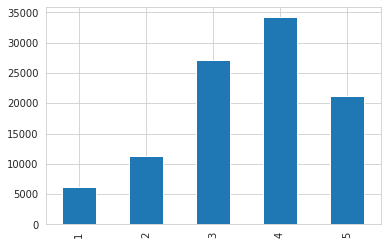

In [147]:
for column in ["rating"]:
    print(column)
    rating_df[column].value_counts().sort_index().plot(kind='bar')
    plt.show()

In [148]:
SCORE_DIFF = rating_df["rating"].max() - rating_df["rating"].min()
SCORE_MIN = rating_df["rating"].min()

In [149]:
print(f"SCORE_DIFF = {SCORE_DIFF}")
print(f"SCORE_MIN = {SCORE_MIN}")

SCORE_DIFF = 4
SCORE_MIN = 1


In [150]:
for column in ["rating"]:
    MIN = rating_df[column].min()
    MAX = rating_df[column].max()
    rating_df[column] = (rating_df[column] - MIN) / (MAX - MIN)
rating_df.head()

,user_id,movie_id,rating
0,1,1,1.00
1,1,2,0.50
2,1,3,0.75
3,1,4,0.50
4,1,5,0.50


# 기반 클래스 생성

In [151]:
user_np = user_df.to_numpy()
print(user_np.shape)
print(user_np[:2])

(943, 30)
[[1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [2 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [152]:
content_np = item_df.to_numpy()
print(content_np.shape)
print(content_np[:2])

(1682, 21)
[[1.         0.         0.         0.         1.         1.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.89285714]
 [2.         0.         1.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.89285714]]


In [153]:
rating_np = rating_df.to_numpy()
print(rating_np.shape)
print(rating_np[:5])

(100000, 3)
[[1.   1.   1.  ]
 [1.   2.   0.5 ]
 [1.   3.   0.75]
 [1.   4.   0.5 ]
 [1.   5.   0.5 ]]


# 상수 정의

In [154]:
LATENT_SIZE = 2

In [155]:
BATCH_SIZE = 256

# User, Content, Score 클래스 정의

In [156]:
import copy

In [157]:
class User:
    def __init__(self, id, features):
        self.id = id
        self.features = features
        self.latent = np.random.random(LATENT_SIZE)

    def __str__(self):
        return f"id:{self.id}, features:{self.features}"

    def copy(self):
        return copy.deepcopy(self)  

    def is_same(self, other):
        return self.id == other.id

In [158]:
class Content:
    def __init__(self, id, features):
        self.id = id
        self.features = features
        self.latent = np.random.random(LATENT_SIZE)

    def __str__(self):
        return f"id:{self.id}, features:{self.features}"

    def copy(self):
        return copy.deepcopy(self)  

    def is_same(self, other):
        return self.id == other.id

In [159]:
class Score:
    def __init__(self, user, content, values):
        self.user = user
        self.content = content
        self.values = values

    def __str__(self):
        return f"user:{self.user.id}, content:{self.content.id}, values:{self.values}"

    def value(self):
        return self.values

    def copy(self):
        return copy.deepcopy(self)  

In [160]:
id_2_user = {}
for i in range(len(user_np)):
    row = user_np[i]
    id = int(row[0])
    features = row[1:]
    user = User(id, features)
    id_2_user[id] = user

In [161]:
id_2_content = {}
for i in range(len(content_np)):
    row = content_np[i]
    id = int(row[0])
    features = row[1:]
    content = Content(id, features)
    id_2_content[id] = content

In [162]:
class Log:
    def __init__(self, raw_values):
        self.user_id = raw_values[0]
        self.content_id = raw_values[1]
        self.scores = raw_values[2:]

    def __str__(self):
        return f"user_id:{self.user_id}, content_id:{self.content_id}, scores:{self.scores}"

# User, Content, Score 객체 만들기

In [163]:
scores = []
for i in range(len(rating_np)):
    log = Log(rating_np[i])
    user = id_2_user[log.user_id]
    content = id_2_content[log.content_id]
    score = Score(user.copy(), content.copy(), log.scores.copy())
    if(i<10): print(score)
    scores.append(score)

user:1, content:1, values:[1.]
user:1, content:2, values:[0.5]
user:1, content:3, values:[0.75]
user:1, content:4, values:[0.5]
user:1, content:5, values:[0.5]
user:1, content:6, values:[1.]
user:1, content:7, values:[0.75]
user:1, content:8, values:[0.]
user:1, content:9, values:[1.]
user:1, content:10, values:[0.5]


In [164]:
print(f"user : {len(id_2_user)}")
print(f"content : {len(id_2_content)}")
print(f"scores : {len(scores)}")

user : 943
content : 1682
scores : 100000


# feature size

In [165]:
SCORE_SIZE = len(scores[0].values)
USER_FEATURE_SIZE = len(scores[0].user.features)
CONTENT_FEATURE_SIZE = len(scores[0].content.features)
print(f"SCORE_SIZE : {SCORE_SIZE}")
print(f"USER_FEATURE_SIZE : {USER_FEATURE_SIZE}")
print(f"CONTENT_FEATURE_SIZE : {CONTENT_FEATURE_SIZE}")


SCORE_SIZE : 1
USER_FEATURE_SIZE : 29
CONTENT_FEATURE_SIZE : 20


# train, test 데이터 나누기

우선 섞고

In [166]:
print(scores[:3])
np.random.shuffle(scores)
print(scores[:3])

[<__main__.Score object at 0x7f3f7e0eebb0>, <__main__.Score object at 0x7f3f95740ac0>, <__main__.Score object at 0x7f3f957408e0>]
[<__main__.Score object at 0x7f3e58296b50>, <__main__.Score object at 0x7f3e24bd46d0>, <__main__.Score object at 0x7f3e2644c370>]


In [167]:
split_index = int(len(scores)*0.9)
train_scores, test_scores = scores[:split_index], scores[split_index:]

# 학습 데이터에 잡음 추가

In [168]:
NOISE_RATIO = 0.0
for score in train_scores:
    if NOISE_RATIO==0.0: continue
    score.values += np.random.randn(SCORE_SIZE)*NOISE_RATIO
    score.values = score.values.clip(0.0, 1.0)


# 모델 정의

In [170]:
from tensorflow.keras.layers import Input, Dense, concatenate, Dropout, GaussianNoise
from tensorflow.keras.layers import Conv1D, Reshape, MaxPooling1D, Flatten
from tensorflow.keras.models import Model
import tensorflow

f0, f1, f2, f3, f4, f5, f6, f7, f8 = 4, 8, 12, 16, 20, 24, 28, 32, 36
def layer(x):
  # x = Conv1D(f0, 3, activation='swish', input_shape=x.shape[1])(x)
  # x = Conv1D(f1, 3, activation='swish')(x)
  # x = Conv1D(f2, 3, activation='swish')(x)
  # x = Conv1D(f3, 3, activation='swish')(x)
  # x = Conv1D(f4, 3, activation='swish')(x)
  # x = Conv1D(f5, 3, activation='swish')(x)
  # x = Conv1D(f6, 3, activation='swish')(x)
  # x = Conv1D(f7, 3, activation='swish')(x)
  # x = Conv1D(f8, x.shaoe[0], activation='swish')(x)
#   x = Dense(f8, activation="swish")(x)
#   x = Dense(f7, activation="swish")(x)
#   x = Dense(f6, activation="swish")(x)
#   x = Dense(f5, activation="swish")(x)
#   x = Dense(f4, activation="swish")(x)
  x = Dense(f3, activation="swish")(x)
  x = Dense(f2, activation="swish")(x)
  x = Dense(f1, activation="swish")(x)
  return x

def build_encoder(name):
  latent_input = Input((LATENT_SIZE,))
  user_feature_input = Input((USER_FEATURE_SIZE,))
  content_feature_input = Input((CONTENT_FEATURE_SIZE,))
  score_input = Input((SCORE_SIZE,))
#   score_input = GaussianNoise(0.3)(score_input)

  latent_x = Dense(6, activation="swish")(latent_input)
  user_feature_x = Dense(int(USER_FEATURE_SIZE/2), activation="swish")(user_feature_input)
  content_feature_x = Dense(int(CONTENT_FEATURE_SIZE/2), activation="swish")(content_feature_input)
  score_x = Dense(6, activation="swish")(score_input)

  x = concatenate([latent_x, user_feature_x, content_feature_x, score_x])
  print(x.shape)
  x = layer(x)
  latent = Dense(LATENT_SIZE, activation="sigmoid")(x)
  return Model((latent_input, user_feature_input, content_feature_input, score_input), latent, name=name)

def build_decoder(name):
  user_latent_input = Input((LATENT_SIZE,))
  user_feature_input = Input((USER_FEATURE_SIZE,))
  content_feature_input = Input((CONTENT_FEATURE_SIZE,))
  content_latent_input = Input((LATENT_SIZE,))

  user_latent_x = Dense(6, activation="swish")(user_latent_input)
  user_feature_x = Dense(int(USER_FEATURE_SIZE/2), activation="swish")(user_feature_input)
  content_feature_x = Dense(int(CONTENT_FEATURE_SIZE/2), activation="swish")(content_feature_input)
  content_lattent_x = Dense(6, activation="swish")(content_latent_input)

  x = concatenate([user_latent_x, user_feature_x, content_feature_x, content_lattent_x])
  x = layer(x)
  score_output = Dense(SCORE_SIZE, activation="sigmoid")(x)

  return Model((user_latent_input, user_feature_input, content_feature_input, content_latent_input), score_output, name=name)

decoder = build_decoder("D")

def build_user_input_autoencoder(name="UIAE"):
  encoder = build_encoder(f"{name}.E")

  user_latent = Input((LATENT_SIZE,))
  user_feature_input = Input((USER_FEATURE_SIZE,))
  content_feature_input = Input((CONTENT_FEATURE_SIZE,))
  score_input = Input((SCORE_SIZE,))

  content_latent = encoder((user_latent, user_feature_input, content_feature_input, score_input))
  score_output = decoder((user_latent, user_feature_input, content_feature_input, content_latent))
  autoencoder = Model((user_latent, user_feature_input, content_feature_input, score_input), (content_latent, score_output), name=name)
  autoencoder.encoder = encoder
  autoencoder.decoder = decoder
  return autoencoder


def build_content_input_autoencoder(name="CIAE"):
  encoder = build_encoder(f"{name}.E")

  content_latent = Input((LATENT_SIZE,))
  user_feature_input = Input((USER_FEATURE_SIZE,))
  content_feature_input = Input((CONTENT_FEATURE_SIZE,))
  score_input = Input((SCORE_SIZE,))

  user_latent = encoder((content_latent, user_feature_input, content_feature_input, score_input))
  score_output = decoder((user_latent, user_feature_input, content_feature_input, content_latent))

  autoencoder = Model((content_latent, user_feature_input, content_feature_input, score_input), (user_latent, score_output), name=name)
  autoencoder.encoder = encoder
  autoencoder.decoder = decoder

  return autoencoder

user_input_autoencoder = build_user_input_autoencoder("UIAE")

(None, 36)


In [179]:
from keras.optimizers.schedules.learning_rate_schedule import ExponentialDecay
from tensorflow.keras.optimizers import Adam, RMSprop

user_input_autoencoder = build_user_input_autoencoder("UIAE")
content_input_autoencoder = build_content_input_autoencoder("CIAE")

lr_schedule = ExponentialDecay(initial_learning_rate=0.0001,
                                                            decay_steps=100000,
                                                            decay_rate=0.96,
                                                            staircase=True)

autoencoder_optimizer = RMSprop(learning_rate=lr_schedule)
encoder_optimizer = RMSprop(learning_rate=lr_schedule)
decoder_optimizer = RMSprop(learning_rate=lr_schedule)


user_input_autoencoder.compile(loss="mse", optimizer=autoencoder_optimizer)
user_input_autoencoder.encoder.compile(loss="mse", optimizer=encoder_optimizer)
user_input_autoencoder.decoder.compile(loss="mse", optimizer=decoder_optimizer)

content_input_autoencoder.compile(loss="mse", optimizer=autoencoder_optimizer)
content_input_autoencoder.encoder.compile(loss="mse", optimizer=encoder_optimizer)
content_input_autoencoder.decoder.compile(loss="mse", optimizer=decoder_optimizer)


(None, 36)
(None, 36)


In [180]:
user_input_autoencoder.summary()
user_input_autoencoder.encoder.summary()
user_input_autoencoder.decoder.summary()

Model: "UIAE"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_137 (InputLayer)         [(None, 2)]          0           []                               
                                                                                                  
 input_138 (InputLayer)         [(None, 29)]         0           []                               
                                                                                                  
 input_139 (InputLayer)         [(None, 20)]         0           []                               
                                                                                                  
 input_140 (InputLayer)         [(None, 1)]          0           []                               
                                                                                               

In [264]:
from neuralplot import ModelPlot

model = content_input_autoencoder.encoder
%matplotlib notebook
modelplot = ModelPlot(model, grid=True, connection=True, linewidth=0.1)
modelplot.show()

<IPython.core.display.Javascript object>

# 학습을 위한 데이터 생성 함수들 정의

In [181]:
def build_user_input_autoencoder_data(scores):
    input_latents = np.array([score.user.latent for score in scores])
    user_features = np.array([score.user.features for score in scores])
    content_features = np.array([score.content.features for score in scores])
    input_scores = np.array([score.value() for score in scores])
    return input_latents, user_features, content_features, input_scores

def build_content_input_autoencoder_data(scores):
    input_latents = np.array([score.content.latent for score in scores])
    user_features = np.array([score.user.features for score in scores])
    content_features = np.array([score.content.features for score in scores])
    input_scores = np.array([score.value() for score in scores])
    return input_latents, user_features, content_features, input_scores


# train 데이터에는 없는 test 데이터 삭제

In [182]:
content_id_2_scores = {}
user_id_2_scores = {}

for score in train_scores:
    content_id_2_scores[score.content.id] = []
    user_id_2_scores[score.user.id] = []

for score in train_scores:
    content_id_2_scores[score.content.id].append(score)
    user_id_2_scores[score.user.id].append(score)

content_ids = content_id_2_scores.keys()
user_ids = user_id_2_scores.keys()

to_be_removed_scores = set()
for score in test_scores:
    if score.content.id not in content_id_2_scores.keys():
        to_be_removed_scores.add(score)
    if score.user.id not in user_id_2_scores.keys():
        to_be_removed_scores.add(score)

print(f"{len(to_be_removed_scores)} scores removed in test_scores.")
for score in to_be_removed_scores:
    test_scores.remove(score)

12 scores removed in test_scores.


# 사용자의 rating 수 파악

In [183]:
user_id_2_scores = {}
for score in train_scores:
    user_id_2_scores[score.user.id] = []

for score in train_scores:
    user_id_2_scores[score.user.id].append(score)

l = [len(l) for l in user_id_2_scores.values()]
print(l)

[228, 262, 188, 134, 262, 87, 63, 189, 116, 329, 33, 39, 265, 353, 434, 244, 335, 367, 153, 314, 445, 289, 235, 210, 336, 119, 219, 287, 206, 652, 127, 25, 81, 165, 153, 97, 210, 280, 118, 186, 96, 96, 153, 48, 108, 27, 65, 85, 443, 143, 315, 25, 18, 73, 166, 253, 118, 395, 348, 175, 240, 216, 108, 370, 196, 270, 157, 107, 97, 324, 81, 198, 29, 25, 125, 20, 233, 32, 51, 135, 167, 129, 206, 85, 596, 206, 47, 123, 191, 236, 116, 189, 130, 29, 49, 65, 355, 107, 213, 156, 48, 205, 179, 100, 82, 50, 130, 115, 219, 51, 211, 464, 125, 274, 143, 278, 56, 27, 55, 47, 204, 156, 166, 204, 23, 244, 20, 43, 162, 105, 132, 31, 55, 249, 123, 279, 50, 163, 58, 299, 131, 90, 74, 112, 150, 252, 143, 36, 44, 20, 291, 83, 99, 132, 67, 23, 18, 185, 343, 83, 247, 164, 92, 50, 170, 74, 57, 173, 44, 131, 360, 226, 70, 237, 45, 31, 349, 286, 98, 215, 131, 136, 105, 114, 29, 258, 25, 242, 140, 41, 41, 301, 77, 145, 290, 58, 136, 151, 435, 259, 97, 23, 258, 33, 132, 198, 162, 118, 406, 103, 204, 50, 118, 27, 104

In [184]:
print(np.mean(l))

95.44008483563097


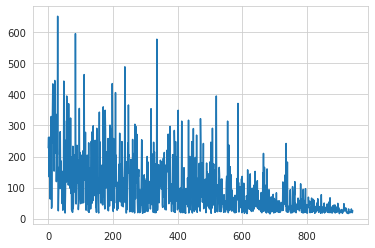

In [185]:
plt.plot(l)
plt.show()

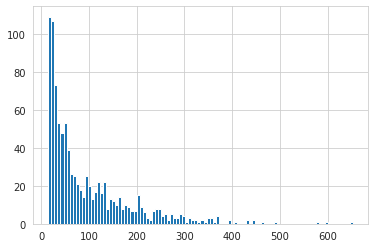

In [186]:
plt.hist(l, bins=100)
plt.show()

# 학습 위한 함수

In [187]:
def build_input_output(train_scores):
    size = len(train_scores)
    ul = np.empty((size, LATENT_SIZE))
    uf = np.empty((size, USER_FEATURE_SIZE))
    cf = np.empty((size, CONTENT_FEATURE_SIZE))
    cl = np.empty((size, LATENT_SIZE))
    s = np.empty((size, SCORE_SIZE))
    for i, score in enumerate(train_scores):
        ul[i] = score.user.latent
        uf[i] = score.user.features
        cf[i] = score.content.features
        cl[i] = score.content.latent
        s[i] = score.values
    return ul, uf, cf, cl, s

In [188]:
LAMDA = 1.0

def build_content_id_2_latent(train_scores, content_latents):
    id_2_latents = {}
    for score in train_scores:
        id_2_latents[score.content.id] = []
    for score, content_latent in zip(train_scores, content_latents):
        id_2_latents[score.content.id].append(content_latent)
    id_2_latent = {}
    for id, latents in id_2_latents.items():
        id_2_latent[id] = np.mean(np.array(latents), axis=0)
    return id_2_latent

def build_user_id_2_latent(train_scores, user_latents):
    id_2_latents = {}
    for score in train_scores:
        id_2_latents[score.user.id] = []
    for score, user_latent in zip(train_scores, user_latents):
        id_2_latents[score.user.id].append(user_latent)
    id_2_latent = {}
    for id, latents in id_2_latents.items():
        id_2_latent[id] = np.mean(np.array(latents), axis=0)
    return id_2_latent

def update_content_latents_by_encoder(encoder, train_scores):
    user_latents, user_features, content_features, _, scores = build_input_output(train_scores)
    content_latents = encoder.predict((user_latents, user_features, content_features, scores), batch_size=BATCH_SIZE)
    id_2_latent = build_content_id_2_latent(train_scores, content_latents)
    for score in train_scores:
        score.content.latent = (1-LAMDA)*score.content.latent + LAMDA*id_2_latent[score.content.id]

def update_user_latents_by_encoder(encoder, train_scores):
    _, user_features, content_features, content_latents, scores = build_input_output(train_scores)
    user_latents = encoder.predict((content_latents, user_features, content_features, scores), batch_size=BATCH_SIZE)
    id_2_latent = build_user_id_2_latent(train_scores, user_latents)
    for score in train_scores:
        score.user.latent = (1-LAMDA)*score.user.latent + LAMDA*id_2_latent[score.user.id]


In [189]:
from scipy.stats import gaussian_kde
import seaborn as sns


def update_test_score_latents_with_train_scores(train_scores, test_scores):

    user_id_2_latents = {}
    content_id_2_latents = {}
    for score in train_scores:
        user_id_2_latents[score.user.id] = []
        content_id_2_latents[score.content.id] = []

    for score in train_scores:
        user_id_2_latents[score.user.id].append(score.user.latent)
        content_id_2_latents[score.content.id].append(score.content.latent)

    user_id_2_latent = {}
    content_id_2_latent = {}

    def get_mean_latent(latents):
        return np.mean(np.array(latents), axis=0)

    for id in user_id_2_latents.keys():
        user_id_2_latent[id] = get_mean_latent(user_id_2_latents[id])
    for id in content_id_2_latents.keys():
        content_id_2_latent[id] = get_mean_latent(content_id_2_latents[id])

    for score in test_scores:
        score.user.latent = user_id_2_latent[score.user.id]
        score.content.latent = content_id_2_latent[score.content.id]

In [190]:

def evaluate(train_scores, test_scores):

    ul, uf, cf, cl, true_scores = build_input_output(train_scores)
    predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)
    mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
    train_rmse = round(mse**0.5, 4)


    update_test_score_latents_with_train_scores(train_scores, test_scores)

    ul, uf, cf, cl, true_scores = build_input_output(test_scores)
    predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)
    mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
    test_rmse = round(mse**0.5, 4)  

    return train_rmse, test_rmse

In [191]:
class Logger():
    def __init__(self):
        self.key_2_list = {}

    def _prepare_list(self, key):
        if key not in self.key_2_list.keys():
            self.key_2_list[key] = []

    def append(self, keras_history):
        for key in keras_history.history.keys():
            self._prepare_list(key)
            self.key_2_list[key].append(keras_history.history[key][-1])

    def __getitem__(self, key):
        return self.key_2_list[key]


In [192]:
def update_score_latent_with_encoders(uie, cie, iter_count, train_scores):
    for i in range(iter_count):
        ul, uf, cf, cl, s = build_input_output(train_scores)
        predicted_cl = uie.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)
        predicted_ul = cie.predict((cl, uf, cf, s), batch_size=BATCH_SIZE)

        for score, ul, cl in zip(train_scores, predicted_ul, predicted_cl):
            score.user.latent = ul
            score.content.latent = cl


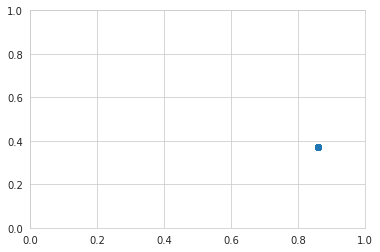

In [193]:
sample_user_id = 1
scores_of_sample_user = [score for score in train_scores if score.user.id==sample_user_id]

def draw_user_latent_distribution(scores):
    sample_user_latents = np.array([score.user.latent for score in scores])
    plt.scatter(sample_user_latents[:,0], sample_user_latents[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()
draw_user_latent_distribution(scores_of_sample_user)    

# 학습 실행

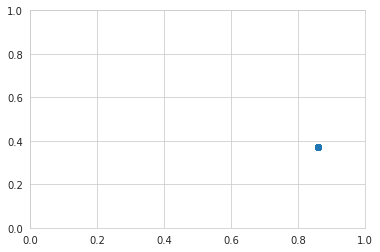

0/24
 24/317 [=>............................] - ETA: 1s - loss: 0.1770 - UIAE.E_loss: 0.0789 - D_loss: 0.0981

2022-11-22 17:01:05.403009: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


40/40 [==============================] - 0s 919us/step
train_rmse=1.1246, test_rmse=1.1246, diff=0.0


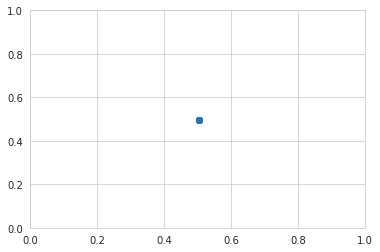

1/24
40/40 [==============================] - 0s 941us/step
train_rmse=1.1132, test_rmse=1.1122, diff=-0.001


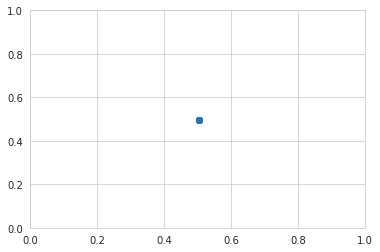

2/24
40/40 [==============================] - 0s 1ms/step
train_rmse=1.0988, test_rmse=1.0961, diff=-0.0027


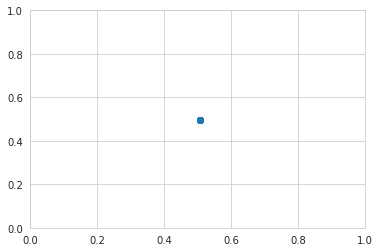

3/24
40/40 [==============================] - 0s 920us/step
train_rmse=1.0801, test_rmse=1.0765, diff=-0.0036


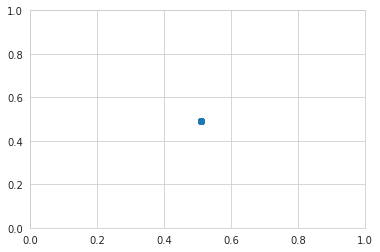

4/24
40/40 [==============================] - 0s 1ms/step
train_rmse=1.0354, test_rmse=1.0355, diff=0.0001


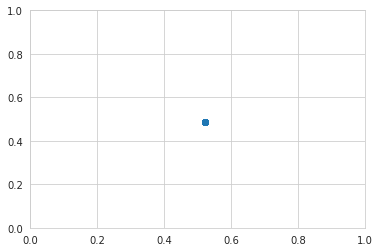

5/24
40/40 [==============================] - 0s 936us/step
train_rmse=0.9682, test_rmse=0.9786, diff=0.0104


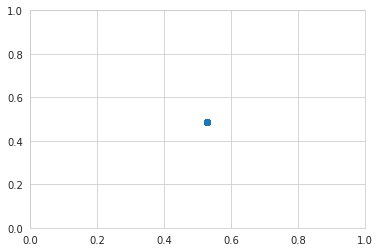

6/24
40/40 [==============================] - 0s 955us/step
train_rmse=0.9392, test_rmse=0.9541, diff=0.0149


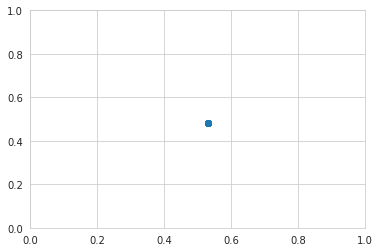

7/24
40/40 [==============================] - 0s 945us/step
train_rmse=0.9287, test_rmse=0.9452, diff=0.0165


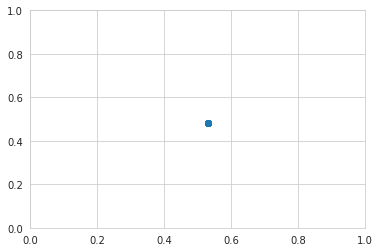

8/24
40/40 [==============================] - 0s 958us/step
train_rmse=0.925, test_rmse=0.9419, diff=0.0169


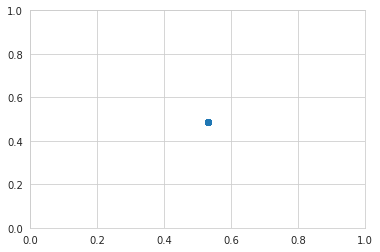

9/24
40/40 [==============================] - 0s 895us/step
train_rmse=0.924, test_rmse=0.9416, diff=0.0176


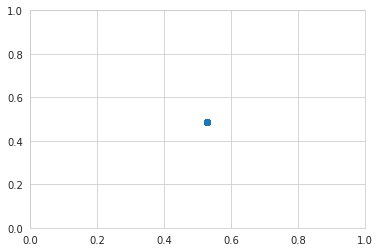

10/24
40/40 [==============================] - 0s 866us/step
train_rmse=0.9239, test_rmse=0.9409, diff=0.017


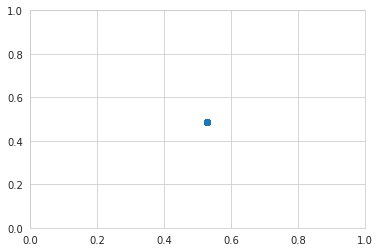

11/24
40/40 [==============================] - 0s 944us/step
train_rmse=0.9228, test_rmse=0.9402, diff=0.0174


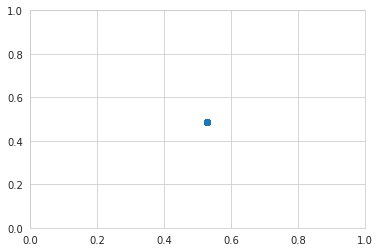

12/24
40/40 [==============================] - 0s 964us/step
train_rmse=0.9235, test_rmse=0.9412, diff=0.0177


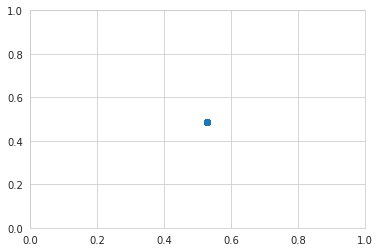

13/24
40/40 [==============================] - 0s 907us/step
train_rmse=0.9192, test_rmse=0.9379, diff=0.0187


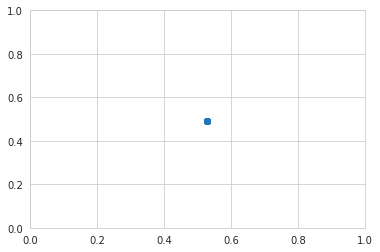

14/24
40/40 [==============================] - 0s 943us/step
train_rmse=0.9192, test_rmse=0.9382, diff=0.019


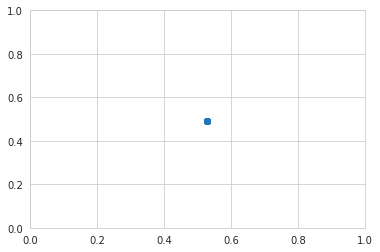

15/24
40/40 [==============================] - 0s 979us/step
train_rmse=0.9277, test_rmse=0.946, diff=0.0183


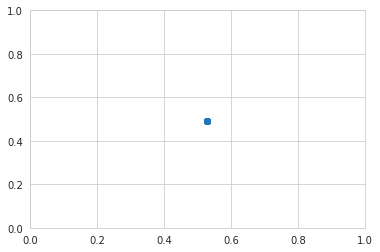

16/24
40/40 [==============================] - 0s 845us/step
train_rmse=0.9202, test_rmse=0.9398, diff=0.0196


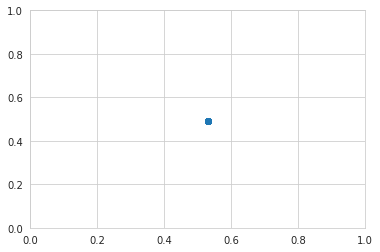

17/24
40/40 [==============================] - 0s 918us/step
train_rmse=0.9165, test_rmse=0.9371, diff=0.0206


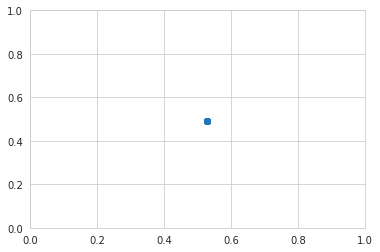

18/24
40/40 [==============================] - 0s 931us/step
train_rmse=0.9281, test_rmse=0.9473, diff=0.0192


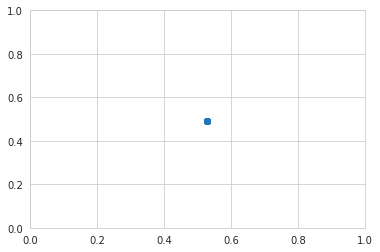

19/24
40/40 [==============================] - 0s 914us/step
train_rmse=0.9205, test_rmse=0.9407, diff=0.0202


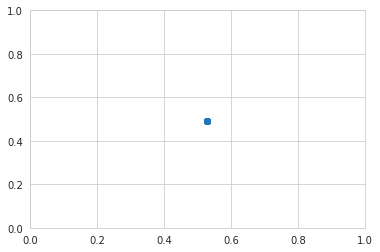

20/24
40/40 [==============================] - 0s 937us/step
train_rmse=0.9201, test_rmse=0.9407, diff=0.0206


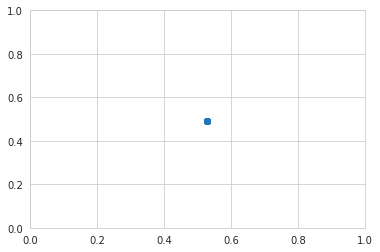

21/24
40/40 [==============================] - 0s 925us/step
train_rmse=0.9201, test_rmse=0.941, diff=0.0209


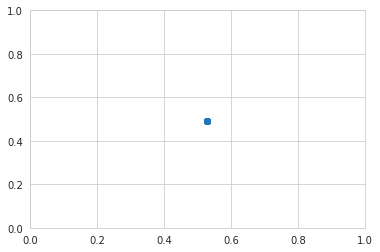

22/24
40/40 [==============================] - 0s 1ms/step
train_rmse=0.9179, test_rmse=0.9393, diff=0.0214


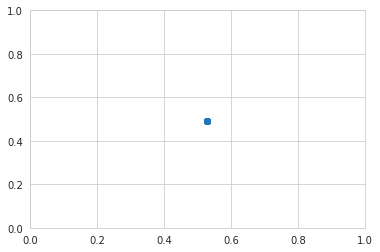

23/24
40/40 [==============================] - 0s 1ms/step
train_rmse=0.915, test_rmse=0.9375, diff=0.0225


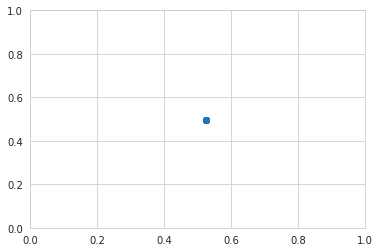

In [194]:
EPOCH = 24

user_input_autoencoder.encoder.trainable = True
user_input_autoencoder.decoder.trainable = True
content_input_autoencoder.encoder.trainable = True
content_input_autoencoder.decoder.trainable = True

train_rmses = []
test_rmses = []
logger1 = Logger()
logger2 = Logger()

draw_user_latent_distribution(scores_of_sample_user)
for epoch in range(EPOCH):
    print(f"{epoch}/{EPOCH}")
    np.random.shuffle(train_scores)

    ul, uf, cf, cl, s = build_input_output(train_scores)
    autoencoder1_hist = user_input_autoencoder.fit((ul, uf, cf, s), (cl, s),
                                                   epochs=1,
                                                   batch_size=BATCH_SIZE,
                                                   validation_split=0.1)
    update_content_latents_by_encoder(user_input_autoencoder.encoder, train_scores)

    ul, uf, cf, cl, s = build_input_output(train_scores)
    autoencoder2_hist = content_input_autoencoder.fit((cl, uf, cf, s), (ul, s),
                                                      epochs=1,
                                                      batch_size=BATCH_SIZE,
                                                      validation_split=0.1)
    update_user_latents_by_encoder(content_input_autoencoder.encoder, train_scores)

    train_rmse, test_rmse = evaluate(train_scores, test_scores)
    print(f"train_rmse={train_rmse}, test_rmse={test_rmse}, diff={round(test_rmse-train_rmse, 5)}")
    draw_user_latent_distribution(scores_of_sample_user)

    logger1.append(autoencoder1_hist)
    logger2.append(autoencoder2_hist)

    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)


In [195]:
def show_total_loss(logger1, logger2):
    print("total loss")

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(logger1['loss'])

    plt.subplot(1, 2, 2)
    plt.plot(logger2['loss'])

    plt.show()

    print(round(logger1['loss'][-1], 5), round(logger2['loss'][-1], 5))
    print()


def show_latent_loss(logger1, logger2):
    print("latent loss")

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(logger1['UIAE.E_loss'])

    plt.subplot(1, 2, 2)
    plt.plot(logger2['CIAE.E_loss'])

    plt.show()

    print(round(logger1['UIAE.E_loss'][-1], 5), round(logger2['CIAE.E_loss'][-1], 5))
    print()


def show_score_loss(logger1, logger2):
    print("score loss")

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(logger1['D_loss'])

    plt.subplot(1, 2, 2)
    plt.plot(logger2['D_loss'])

    plt.show()

    print(round(logger1['D_loss'][-1], 5), round(logger2['D_loss'][-1], 5))
    print()


def show_rmse(train_rmses, test_rmses):
    print("RMSE")
    plt.plot(train_rmses, label="train rmse")
    plt.plot(test_rmses, label="test rmse")
    plt.legend()
    plt.show()

    print(f"train_rmse={round(train_rmses[-1], 5)}, test_rmse={round(test_rmses[-1], 5)}")
    print()


def show_loss(logger1, logger2, train_rmses, test_rmses):
    show_total_loss(logger1, logger2)
    show_latent_loss(logger1, logger2)
    show_score_loss(logger1, logger2)
    show_rmse(train_rmses, test_rmses)

total loss


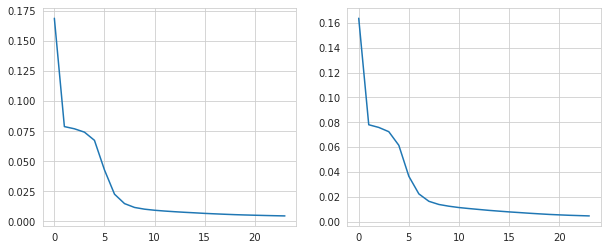

0.0045 0.00459

latent loss


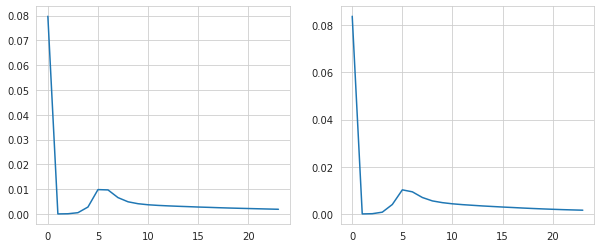

0.00188 0.00161

score loss


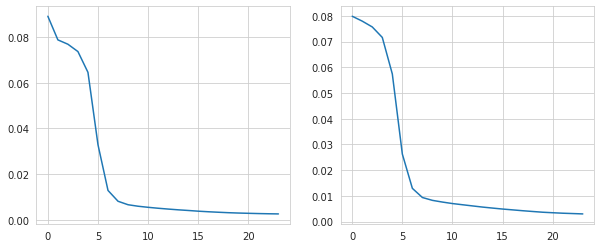

0.00262 0.00298

RMSE


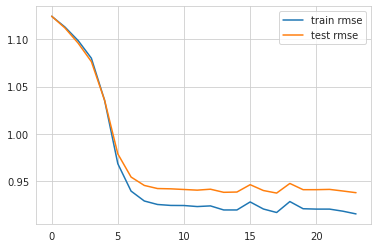

train_rmse=0.915, test_rmse=0.9375



In [196]:
show_loss(logger1, logger2, train_rmses, test_rmses)

# 학습 결과 살펴보기

## AE의 입력으로 구한 score

In [197]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_latents, predicted_scores = user_input_autoencoder.predict((ul, uf, cf, s),
                                                                     batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

352/352 [==============================] - 1s 2ms/step
0.0027731115396725918


## encoder의 출력을 decoder 입력으로 구한 score

In [198]:
predicted_cl = user_input_autoencoder.encoder.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, predicted_cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

352/352 [==============================] - 0s 1ms/step
0.0027731115396725918


## train data로 직접 decoder로 구한 score

In [199]:
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

352/352 [==============================] - 0s 1ms/step
0.0523294292406824


## train data 담긴 한 유저의 latent

In [200]:
scores_of_user_id_1 = user_id_2_scores[1]
print(np.array([ score.user.latent for score in scores_of_user_id_1])[:5])

[[0.52532279 0.49490523]
 [0.52532279 0.49490523]
 [0.52532279 0.49490523]
 [0.52532279 0.49490523]
 [0.52532279 0.49490523]]


## encoder로 구한 한 유저의 latent

In [201]:
ul, uf, cf, cl, s = build_input_output(scores_of_user_id_1)
predicted_user_latents = content_input_autoencoder.encoder.predict((cl, uf, cf, s), batch_size=BATCH_SIZE)

print(predicted_user_latents[:5])

1/1 [==============================] - 0s 24ms/step
[[0.5773112  0.4537861 ]
 [0.48011294 0.53311455]
 [0.4978805  0.5189843 ]
 [0.47335666 0.5335798 ]
 [0.4891065  0.52312696]]


In [202]:
print(np.std(predicted_user_latents, axis=0))

[0.04718011 0.03754668]


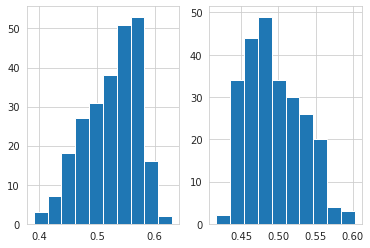

latent variation width : [0.23985642 0.18612403]


In [203]:
plt.subplot(1,2,1)
plt.hist(predicted_user_latents[:,0])
plt.subplot(1,2,2)
plt.hist(predicted_user_latents[:,1])
plt.show()
print("latent variation width :", np.max(predicted_user_latents, axis=0)-np.min(predicted_user_latents, axis=0))

In [204]:
from sklearn.metrics import mean_squared_error

SCORE_NAMES = ["rating", "dummy1", "dummy2", "dummy3", "dummy4"]
def show_regression_result(train_or_test, true_scores, predicted_scores):

    print(f"{train_or_test} Data")
    print("true_score : predicted_score")
    plt.figure(figsize=(SCORE_SIZE*4, 3))
    for i in range(SCORE_SIZE):
        plt.subplot(1,SCORE_SIZE,i+1)
        plt.scatter(true_scores[:,i], predicted_scores[:,i], marker='.')
        plt.xlim((0.0, 1.0))
        plt.ylim((0.0, 1.0))
        plt.title(f'{SCORE_NAMES[i]}')
        plt.xlabel('truth')
        plt.ylabel('predicted')
    plt.show()

    # mse = mean_squared_error(true_scores, predicted_scores)
    # print("mse :",mse)
    # rmse = mse**0.5
    # print("rmse :",rmse)

    mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
    # print("mse :",mse)
    rmse = mse**0.5
    print("rmse :",rmse)


In [205]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)

352/352 [==============================] - 0s 1ms/step


Train Data
true_score : predicted_score


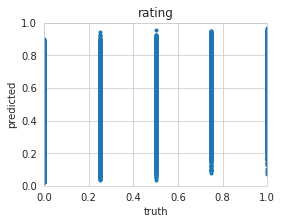

rmse : 0.9150250644685107


In [206]:
show_regression_result("Train", s, predicted_scores)

In [207]:
update_test_score_latents_with_train_scores(train_scores, test_scores)
ul, uf, cf, cl, s = build_input_output(test_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)


40/40 [==============================] - 0s 1ms/step


Test Data
true_score : predicted_score


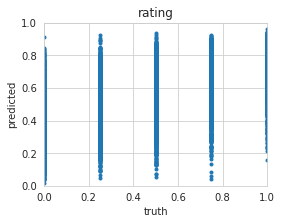

rmse : 0.9375400221516013


In [208]:
show_regression_result("Test", s, predicted_scores)

# Decoder 추가 학습

# 학습 실행

In [209]:
EPOCH = 10

from tensorflow.keras.optimizers import Adam, RMSprop
decoder_optimizer = RMSprop(learning_rate=0.001*0.1)
user_input_autoencoder.decoder.compile(loss="mse", optimizer=decoder_optimizer)


train_rmses = []
test_rmses = []
logger1 = Logger()
logger2 = Logger()

ul, uf, cf, cl, s = build_input_output(train_scores)

for epoch in range(EPOCH):
    print(f"{epoch}/{EPOCH}")

    autoencoder1_hist = user_input_autoencoder.decoder.fit((ul, uf, cf, cl), s,
        epochs=1, batch_size=BATCH_SIZE, validation_split=0.1)        

    train_rmse, test_rmse = evaluate(train_scores, test_scores)
    print(f"train_rmse={train_rmse}, test_rmse={test_rmse}, diff={round(test_rmse-train_rmse,5)}")

    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)


0/10
40/40 [==============================] - 0s 1ms/step
train_rmse=0.9146, test_rmse=0.9371, diff=0.0225
1/10
40/40 [==============================] - 0s 1ms/step
train_rmse=0.9182, test_rmse=0.9411, diff=0.0229
2/10
40/40 [==============================] - 0s 1ms/step
train_rmse=0.9191, test_rmse=0.9401, diff=0.021
3/10
40/40 [==============================] - 0s 1ms/step
train_rmse=0.9153, test_rmse=0.9381, diff=0.0228
4/10
40/40 [==============================] - 0s 1ms/step
train_rmse=0.9141, test_rmse=0.9362, diff=0.0221
5/10
40/40 [==============================] - 0s 1ms/step
train_rmse=0.9139, test_rmse=0.9355, diff=0.0216
6/10
40/40 [==============================] - 0s 2ms/step
train_rmse=0.9134, test_rmse=0.9354, diff=0.022
7/10
40/40 [==============================] - 0s 1ms/step
train_rmse=0.9141, test_rmse=0.9357, diff=0.0216
8/10
40/40 [==============================] - 0s 939us/step
train_rmse=0.9163, test_rmse=0.9376, diff=0.0213
9/10
40/40 [=========================

RMSE


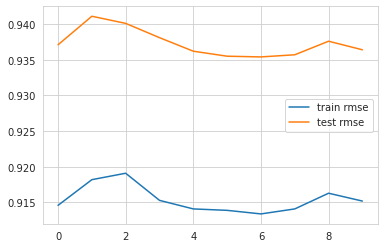

train_rmse=0.9152, test_rmse=0.9364



In [210]:
show_rmse(train_rmses, test_rmses)

# 학습 결과 살펴보기

## AE의 입력으로 구한 score

In [211]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_latents, predicted_scores = user_input_autoencoder.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)        

mse = mean_squared_error(s, predicted_scores)
print(mse)

352/352 [==============================] - 0s 1ms/step
0.0027170749916914532


## encoder의 출력을 decoder 입력으로 구한 score

In [212]:
predicted_cl = user_input_autoencoder.encoder.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, predicted_cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

352/352 [==============================] - 0s 909us/step
0.0027170749916914532


## train data로 직접 decoder로 구한 score

In [213]:
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

352/352 [==============================] - 0s 1ms/step
0.05234481303038248


## train data 담긴 한 유저의 latent

In [214]:
scores_of_user_id_1 = user_id_2_scores[1]
print(np.array([ score.user.latent for score in scores_of_user_id_1])[:5])

[[0.52532279 0.49490523]
 [0.52532279 0.49490523]
 [0.52532279 0.49490523]
 [0.52532279 0.49490523]
 [0.52532279 0.49490523]]


## encoder로 구한 한 유저의 latent

In [215]:
ul, uf, cf, cl, s = build_input_output(scores_of_user_id_1)
predicted_user_latents = content_input_autoencoder.encoder.predict((cl, uf, cf, s), batch_size=BATCH_SIZE)

print(predicted_user_latents[:5])

1/1 [==============================] - 0s 15ms/step
[[0.5773112  0.4537861 ]
 [0.48011294 0.53311455]
 [0.4978805  0.5189843 ]
 [0.47335666 0.5335798 ]
 [0.4891065  0.52312696]]


In [216]:
print(np.std(predicted_user_latents, axis=0))

[0.04718011 0.03754668]


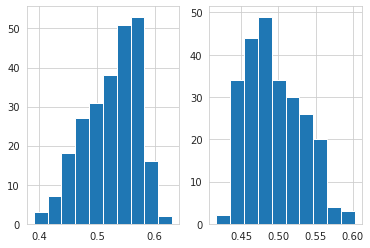

latent variation width : [0.23985642 0.18612403]


In [217]:
plt.subplot(1,2,1)
plt.hist(predicted_user_latents[:,0])
plt.subplot(1,2,2)
plt.hist(predicted_user_latents[:,1])
plt.show()
print("latent variation width :", np.max(predicted_user_latents, axis=0)-np.min(predicted_user_latents, axis=0))

In [218]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl))

2813/2813 [==============================] - 3s 920us/step


Train Data
true_score : predicted_score


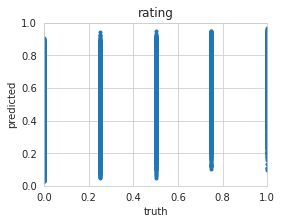

rmse : 0.9151595534116371


In [219]:
show_regression_result("Train", s, predicted_scores)

In [220]:
update_test_score_latents_with_train_scores(train_scores, test_scores)
ul, uf, cf, cl, s = build_input_output(test_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl))


313/313 [==============================] - 0s 928us/step


Test Data
true_score : predicted_score


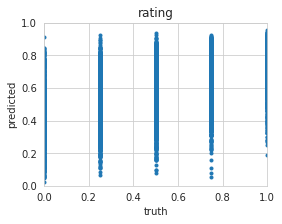

rmse : 0.9363686864373281


In [221]:
show_regression_result("Test", s, predicted_scores)

# 좀 살펴보기

In [222]:
target_index = -1
for i in range(1000):
    if s[i]==0.5:
        target_index = i
        break
print(target_index)
print(s[target_index])

2
[0.5]


target_index=1
[0.5]
40/40 [==============================] - 0s 937us/step
predicted score


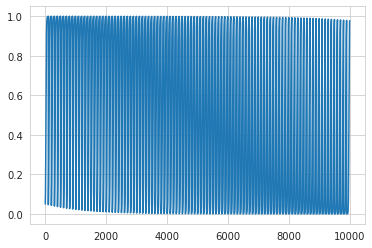


diff


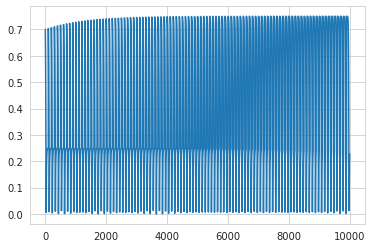


diff heatmap


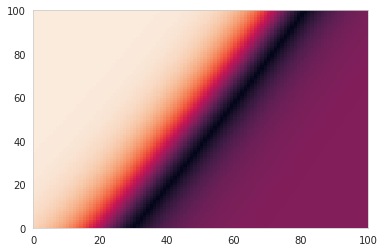

In [223]:
user_latents, user_features, content_features, content_latents, scores = build_input_output(train_scores)

target_index = -1
for i in range(1000):
    if scores[i][0]==0.5:
        target_index = i
        break
print(f"target_index={target_index}")
print(scores[target_index])


ul = np.empty((100*100, LATENT_SIZE))
uf = np.empty((100*100, USER_FEATURE_SIZE))
cf = np.empty((100*100, CONTENT_FEATURE_SIZE))
cl = np.empty((100*100, LATENT_SIZE))

for i in range(100):
    for j in range(100):
        ul[i*100+j] = user_latents[target_index]
        uf[i*100+j] = user_features[target_index]
        cf[i*100+j] = content_features[target_index]
        cl[i*100+j] = np.array([i*0.01,j*0.01])

ps = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)
print("predicted score")
plt.plot(ps)
plt.show()
print()

ps = np.abs(ps - s[target_index])
print("diff")
plt.plot(ps)
plt.show()
print()

hm = ps.reshape((100,100))
print("diff heatmap")
plt.pcolor(hm)
plt.show()

target_user_id=276
464


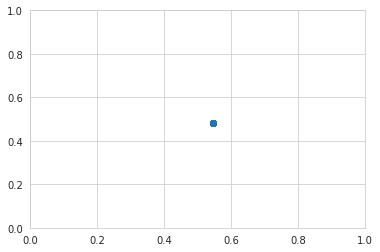

In [224]:
target_user_id = train_scores[target_index].user.id
print(f"target_user_id={target_user_id}")

scores_of_target_user_id = [score for score in train_scores if score.user.id==target_user_id]
print(len(scores_of_target_user_id))

uls = np.array([score.user.latent for score in scores_of_target_user_id])
plt.scatter(uls[:,0], uls[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


0.5 스코어를 보인 특정 user가 포함된 score들에 대한 decoder의 예측값 분포


target_user_id=276
464


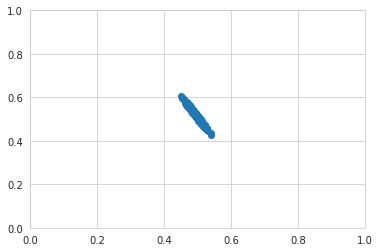

15/15 [==============================] - 0s 2ms/step
rmse=0.7422


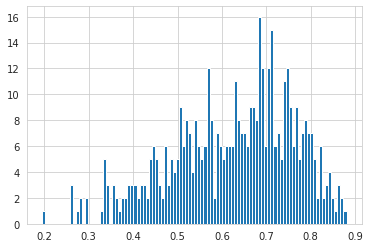

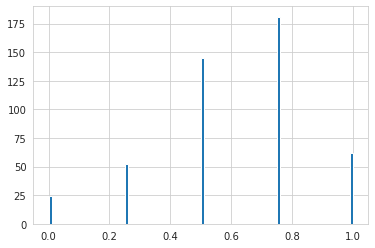

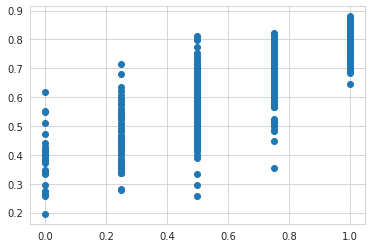

0.1586096


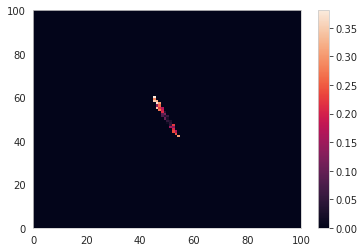

In [226]:
target_user_id = train_scores[target_index].user.id
print(f"target_user_id={target_user_id}")

scores_of_target_user_id = [score for score in train_scores if score.user.id==target_user_id]
print(len(scores_of_target_user_id))

cls = np.array([score.content.latent for score in scores_of_target_user_id])

plt.scatter(cls[:,0], cls[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

ul = np.empty((len(scores_of_target_user_id), LATENT_SIZE))
uf = np.empty((len(scores_of_target_user_id), USER_FEATURE_SIZE))
cf = np.empty((len(scores_of_target_user_id), CONTENT_FEATURE_SIZE))
cl = np.empty((len(scores_of_target_user_id), LATENT_SIZE))
s = np.empty((len(scores_of_target_user_id), SCORE_SIZE))

first_ul = scores_of_target_user_id[0].user.latent
for i, score in enumerate(scores_of_target_user_id):
    ul[i] = first_ul # 0.5 스코어가 나온 ul로 고정
    uf[i] = score.user.features
    cf[i] = score.content.features
    cl[i] = score.content.latent
    s[i] = score.values

ps = decoder.predict((ul, uf, cf, cl))
ts = np.full_like(ps, 0.5)
mse = mean_squared_error((ts*SCORE_DIFF+SCORE_MIN), (ps*SCORE_DIFF+SCORE_MIN))
rmse = round(mse**0.5, 4)  
print(f"rmse={rmse}")
plt.hist(ps, bins=100)
plt.show()

plt.hist(s, bins=100)
plt.show()

plt.scatter(s, ps)
plt.show()


ps = np.abs(ps-0.5)

print(np.mean(ps))

hm = np.zeros((100,100))
for i, score in enumerate(scores_of_target_user_id):
    y, x = (score.content.latent*100).astype(int)
    hm[x,y] = ps[i]

plt.pcolor(hm)
plt.colorbar()
plt.show()

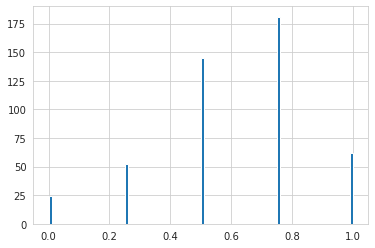

464


In [227]:
s = [score.values[0] for score in scores_of_target_user_id]
plt.hist(s, bins=100)
plt.show()
print(len(s))

같은 user id의 user latent 분포

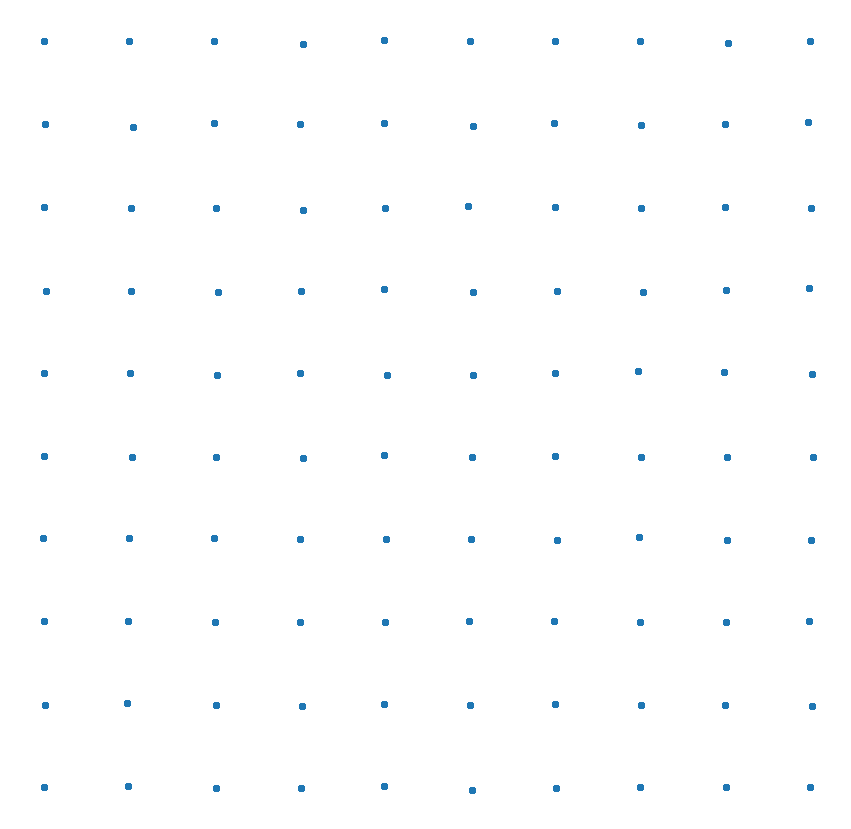

In [228]:
plt.figure(figsize=(15,15))
for target_user_id in range(1,1+100):
    same_user_id_scores = [score for score in train_scores if score.user.id==target_user_id]
    uls = np.array([score.user.latent for score in same_user_id_scores])
    plt.subplot(10,10,target_user_id)
    plt.scatter(uls[:,0], uls[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.axis('off')

plt.show()

같은 content id의 content latent 분포

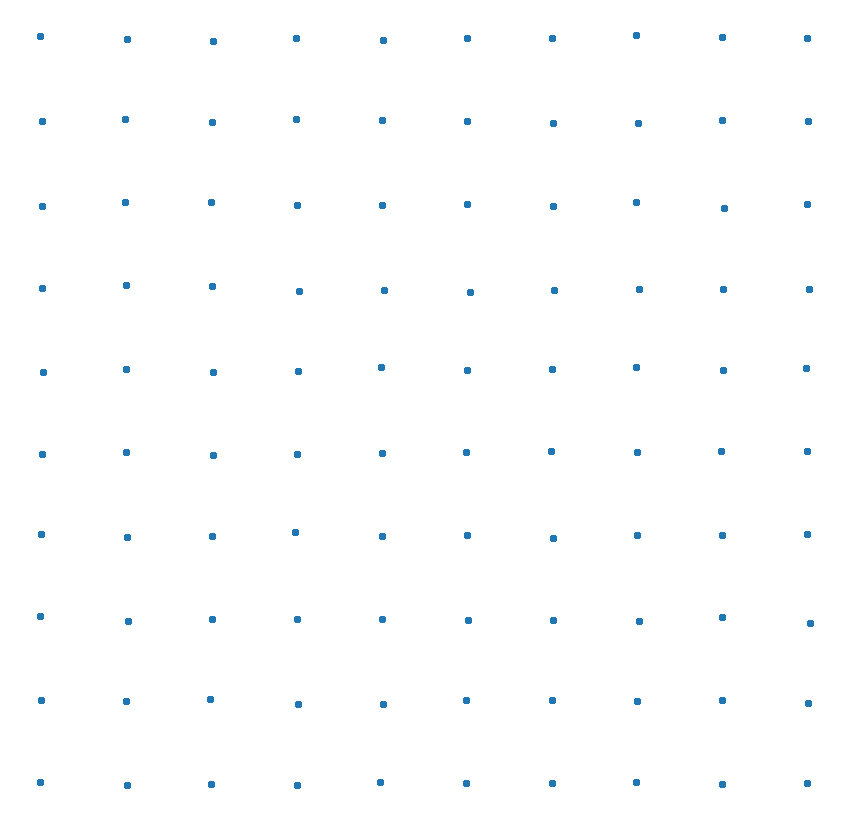

In [229]:
plt.figure(figsize=(15,15))
for target_content_id in range(1,1+100):
    same_content_id_scores = [score for score in train_scores if score.content.id==target_content_id]
    cls = np.array([score.content.latent for score in same_content_id_scores])
    plt.subplot(10,10,target_content_id)
    plt.scatter(cls[:,0], cls[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.axis('off')

plt.show()

특정 score의 user latent, content latent값들을 보자

(24401,)


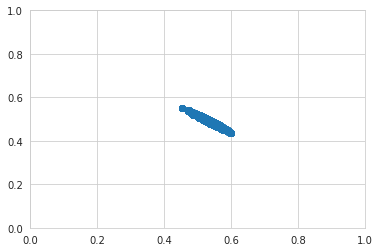

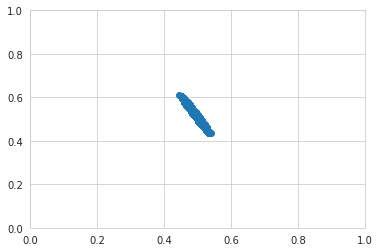

In [230]:
filtered_scores = np.array([score for score in train_scores if score.values==[0.5]])
print(filtered_scores.shape)
ul = np.array([score.user.latent for score in filtered_scores])
cl = np.array([score.content.latent for score in filtered_scores])
plt.scatter(ul[:,0], ul[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

plt.scatter(cl[:,0], cl[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


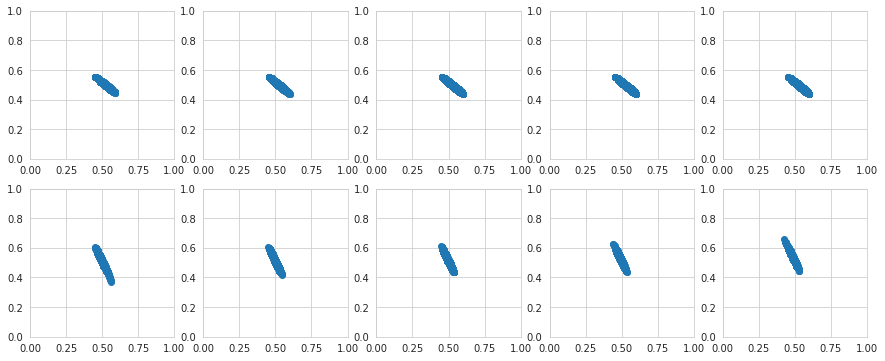

In [231]:
plt.figure(figsize=(15,6))
for i in range(5):
    filtered_scores = np.array([score for score in train_scores if score.values==[i/4]])
    ul = np.array([score.user.latent for score in filtered_scores])
    cl = np.array([score.content.latent for score in filtered_scores])
    plt.subplot(2,5,i+1)
    plt.scatter(ul[:,0], ul[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)

    plt.subplot(2,5,5+i+1)
    plt.scatter(cl[:,0], cl[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
plt.show()


In [243]:
from keras.utils import model_to_dot, plot_model

model = content_input_autoencoder.encoder
SAVE_MODEL_PLOT = 1
if SAVE_MODEL_PLOT == 1:
    plot_model(model,
               to_file=f"test_2.png",
               show_shapes=True,
               show_dtype=False,
               show_layer_names=False,
               rankdir="TB",
               expand_nested=False,
               dpi=96,
               layer_range=None,
               show_layer_activations=True,
               )
    model_to_dot(model,
                 show_shapes=True,
                 show_dtype=False,
                 show_layer_names=True,
                 rankdir="TB",
                 expand_nested=False,
                 dpi=96,
                 subgraph=False,
                 layer_range=None,
                 show_layer_activations=True,
                 )